In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot
from datetime import datetime
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import warnings
warnings.simplefilter('ignore', FutureWarning)

C:\Users\brenna2t\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
raw_data = pd.read_csv('SimpleEnergyUsage.csv')
raw_data['Date']=pd.to_datetime(raw_data['Date'])
raw_data['Year']=pd.DatetimeIndex(raw_data["Date"]).year
raw_data['Month']=pd.DatetimeIndex(raw_data["Date"]).month
#raw_data=raw_data.set_index('Date')
raw_data

,Date,National Avg Temp (F),NG ($/MSCF),US Crude Price ($/BBL),Electricity ($/kWh),US Petroleum Products (Million Barrels),Electrical Generation (Billion Kilowatthours),U.S. Natural Usage (BCF),Year,Month
0,1981-01-01,32.4,3.94,28.81,0.053,571.321,413.516410,1890,1981,1
1,1981-02-01,34.5,3.99,34.30,0.055,475.689,359.719821,1702,1981,2
2,1981-03-01,37.3,4.06,34.59,0.056,493.111,371.667764,1871,1981,3
3,1981-04-01,41.7,4.11,33.92,0.056,460.490,345.682684,1808,1981,4
4,1981-05-01,45.2,4.29,32.73,0.058,475.943,356.277107,1838,1981,5
5,1981-06-01,49.3,4.30,31.68,0.063,482.838,406.041501,1770,1981,6
6,1981-07-01,52.8,4.32,31.10,0.064,486.154,441.309494,1797,1981,7
7,1981-08-01,55.2,4.30,31.10,0.064,473.143,421.278831,1841,1981,8
8,1981-09-01,56.3,4.47,31.10,0.065,469.637,374.102978,1716,1981,9
9,1981-10-01,55.9,4.50,30.98,0.063,490.471,363.115180,1781,1981,10


In [3]:
raw_data2=raw_data
raw_data2["US Petroleum Products (Million Barrels)+12mo"]=raw_data2["US Petroleum Products (Million Barrels)"].shift(periods=-12)
raw_data2["Electrical Generation (Billion Kilowatthours)+12mo"]=raw_data2["Electrical Generation (Billion Kilowatthours)"].shift(periods=-12)
raw_data2["U.S. Natural Usage (BCF)+12mo"]=raw_data2["U.S. Natural Usage (BCF)"].shift(periods=-12)
raw_data2

,Date,National Avg Temp (F),NG ($/MSCF),US Crude Price ($/BBL),Electricity ($/kWh),US Petroleum Products (Million Barrels),Electrical Generation (Billion Kilowatthours),U.S. Natural Usage (BCF),Year,Month,US Petroleum Products (Million Barrels)+12mo,Electrical Generation (Billion Kilowatthours)+12mo,U.S. Natural Usage (BCF)+12mo
0,1981-01-01,32.4,3.94,28.81,0.053,571.321,413.516410,1890,1981,1,499.843,419.388747,1870.0
1,1981-02-01,34.5,3.99,34.30,0.055,475.689,359.719821,1702,1981,2,448.039,361.091146,1716.0
2,1981-03-01,37.3,4.06,34.59,0.056,493.111,371.667764,1871,1981,3,482.375,375.935930,1822.0
3,1981-04-01,41.7,4.11,33.92,0.056,460.490,345.682684,1808,1981,4,481.389,345.753004,1719.0
4,1981-05-01,45.2,4.29,32.73,0.058,475.943,356.277107,1838,1981,5,460.244,354.959962,1698.0
5,1981-06-01,49.3,4.30,31.68,0.063,482.838,406.041501,1770,1981,6,449.944,372.894239,1647.0
6,1981-07-01,52.8,4.32,31.10,0.064,486.154,441.309494,1797,1981,7,459.437,421.730158,1672.0
7,1981-08-01,55.2,4.30,31.10,0.064,473.143,421.278831,1841,1981,8,460.018,411.783352,1643.0
8,1981-09-01,56.3,4.47,31.10,0.065,469.637,374.102978,1716,1981,9,450.658,361.750536,1574.0
9,1981-10-01,55.9,4.50,30.98,0.063,490.471,363.115180,1781,1981,10,460.615,346.344495,1615.0


In [4]:
X = raw_data2.drop(['Date','US Petroleum Products (Million Barrels)+12mo', 'Electrical Generation (Billion Kilowatthours)+12mo','U.S. Natural Usage (BCF)+12mo'], axis=1)
y= raw_data2[['US Petroleum Products (Million Barrels)+12mo', 'Electrical Generation (Billion Kilowatthours)+12mo','U.S. Natural Usage (BCF)+12mo']].values.reshape(-1, 3)
print(X.shape, y.shape)

(454, 9) (454, 3)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_predict=X[-12:]
X2=X[:-12]
y2=y[:-12]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=42)

X_scaler = StandardScaler().fit(X)

#y_scaler = StandardScaler().fit(y)

X_scaled=X_scaler.transform(X)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_predict_scaled=X_scaler.transform(X_predict)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [6]:
X_predict

,National Avg Temp (F),NG ($/MSCF),US Crude Price ($/BBL),Electricity ($/kWh),US Petroleum Products (Million Barrels),Electrical Generation (Billion Kilowatthours),U.S. Natural Usage (BCF),Year,Month
442,56.4,10.15,55.19,0.131,609.217,619.553287,2884,2017,11
443,54.6,9.29,56.98,0.133,630.027,705.757366,3006,2017,12
444,32.2,8.91,62.25,0.134,634.301,747.681372,2959,2018,1
445,33.8,9.63,61.20,0.135,549.344,611.282453,2724,2018,2
446,36.8,9.78,60.68,0.134,637.763,640.916332,3048,2018,3
447,39.9,10.04,63.50,0.135,598.228,602.543622,2960,2018,4
448,45.0,13.65,66.16,0.137,631.052,678.266954,3082,2018,5
449,49.4,16.51,62.80,0.142,621.160,743.661142,2955,2018,6
450,53.1,17.92,67.00,0.143,639.261,823.648759,3108,2018,7
451,55.7,18.63,62.64,0.142,660.371,819.962135,3180,2018,8


In [7]:
from keras.models import Sequential
from keras.layers import Dense

deep_model = Sequential()
deep_model.add(Dense(units=X.shape[1]*3, activation='relu', input_dim=X.shape[1]))
deep_model.add(Dense(units=X.shape[1]*3, activation='relu'))
deep_model.add(Dense(units=3, kernel_initializer='normal'))
deep_model.summary()
deep_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_logarithmic_error'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 27)                270       
_________________________________________________________________
dense_2 (Dense)              (None, 27)                756       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 84        
Total params: 1,110
Trainable params: 1,110
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
 - 0s - loss: 1685741.2700 - mean_squared_logarithmic_error: 45.9754
Epoch 2/200
 - 0s - loss: 1685488.3678 - mean_squared_logarithmic_error: 45.1110
Epoch 3/200
 - 0s - loss: 1685199.3437 - mean_squared_logarithmic_error: 43.7154
Epoch 4/200
 - 0s - loss: 1684803.2432 - mean_squared_logarithmic_error: 41.9922
Epoch 5/200
 - 0s - loss: 1684204.6171 - mean_squared_logarithmic_error: 39.8094
Epoch 6/200
 - 0s - loss: 1683270.9177 - mean_squared_logarithmic_error: 37.1281
Epoch 7/200
 - 0s - loss: 1681881.8206 - mean_squared_logarithmic_error: 34.1015
Epoch 8/200
 - 0s - loss: 1679803.5087 - mean_squared_logarithmic_error: 30.8709
Epoch 9/200
 - 0s - loss: 1676847.4184 - mean_squared_logarithmic_error: 27.6643
Epoch 10/200
 - 0s - loss: 1672812.7432 - mean_squared_logarithmic_error: 24.6146
Epoch 11/200
 - 0s - loss: 1667407.3100 - mean_squared_logarithmic_error: 21.8225
Epoch 12/200
 - 0s - loss: 1660528.9415 - mean_squared_logarithmic_error: 19.3030
Epoch 13/200
 - 0s - loss

Epoch 104/200
 - 0s - loss: 67303.0624 - mean_squared_logarithmic_error: 0.0614
Epoch 105/200
 - 0s - loss: 65650.7079 - mean_squared_logarithmic_error: 0.0597
Epoch 106/200
 - 0s - loss: 64114.4433 - mean_squared_logarithmic_error: 0.0581
Epoch 107/200
 - 0s - loss: 62568.9324 - mean_squared_logarithmic_error: 0.0564
Epoch 108/200
 - 0s - loss: 61065.7425 - mean_squared_logarithmic_error: 0.0549
Epoch 109/200
 - 0s - loss: 59650.0827 - mean_squared_logarithmic_error: 0.0537
Epoch 110/200
 - 0s - loss: 58307.3450 - mean_squared_logarithmic_error: 0.0526
Epoch 111/200
 - 0s - loss: 57060.8217 - mean_squared_logarithmic_error: 0.0515
Epoch 112/200
 - 0s - loss: 55799.6637 - mean_squared_logarithmic_error: 0.0502
Epoch 113/200
 - 0s - loss: 54592.5730 - mean_squared_logarithmic_error: 0.0489
Epoch 114/200
 - 0s - loss: 53515.3776 - mean_squared_logarithmic_error: 0.0478
Epoch 115/200
 - 0s - loss: 52401.9097 - mean_squared_logarithmic_error: 0.0466
Epoch 116/200
 - 0s - loss: 51349.3566 -

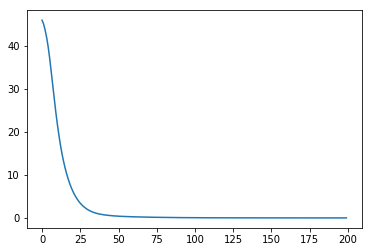

In [8]:
deep_history=deep_model.fit(
    X_train_scaled,
    y_train,
    epochs=200,
    shuffle=True,
    verbose=2
)
pyplot.plot(deep_history.history['mean_squared_logarithmic_error'])
pyplot.show()

In [9]:
model_loss, mean_squared_logarithmic_error = deep_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Deep Neural Network - MSE: {model_loss}, RMSE: {mean_squared_logarithmic_error}")

Deep Neural Network - MSE: 27641.267894847973, RMSE: 0.027258971487885125


In [10]:
prediction=pd.DataFrame(deep_model.predict(X_scaled))
prediction=prediction.rename(columns={0:'US Petroleum Products (Million Barrels) - Predicted', 1:'Electrical Generation (Billion Kilowatthours) - Predicted',2:'U.S. Natural Usage (BCF) - Predicted'})
prediction.tail()

,US Petroleum Products (Million Barrels) - Predicted,Electrical Generation (Billion Kilowatthours) - Predicted,U.S. Natural Usage (BCF) - Predicted
449,917.554871,978.755188,3429.422852
450,1017.807800,1086.329590,3805.341064
451,1056.459106,1127.988403,3950.455322
452,870.731445,930.130493,3257.101318
453,922.143982,984.894165,3449.368408


In [11]:
new_dates = pd.DataFrame(index = pd.date_range('2018-11-1','2019-10-01', freq='MS'))
new_dates["Date"]=new_dates.index
prediction=pd.concat([prediction,new_dates], sort=False)
prediction=prediction.reset_index(drop=True)
prediction=pd.concat([prediction,raw_data], axis=1, sort=False)
#prediction2=pd.merge(prediction,raw_data, on="Date", how="outer")
#prediction2

In [12]:
prediction["US Petroleum Products (Million Barrels) - Predicted"]=prediction["US Petroleum Products (Million Barrels) - Predicted"].shift(periods=12)
prediction["Electrical Generation (Billion Kilowatthours) - Predicted"]=prediction["Electrical Generation (Billion Kilowatthours) - Predicted"].shift(periods=12)
prediction["U.S. Natural Usage (BCF) - Predicted"]=prediction["U.S. Natural Usage (BCF) - Predicted"].shift(periods=12)
prediction=prediction.drop(['Electrical Generation (Billion Kilowatthours)+12mo', 'US Petroleum Products (Million Barrels)+12mo','U.S. Natural Usage (BCF)+12mo'], axis=1)
prediction

,US Petroleum Products (Million Barrels) - Predicted,Electrical Generation (Billion Kilowatthours) - Predicted,U.S. Natural Usage (BCF) - Predicted,Date,Date,National Avg Temp (F),NG ($/MSCF),US Crude Price ($/BBL),Electricity ($/kWh),US Petroleum Products (Million Barrels),Electrical Generation (Billion Kilowatthours),U.S. Natural Usage (BCF),Year,Month
0,NaN,NaN,NaN,NaT,1981-01-01,32.4,3.94,28.81,0.053,571.321,413.516410,1890.0,1981.0,1.0
1,NaN,NaN,NaN,NaT,1981-02-01,34.5,3.99,34.30,0.055,475.689,359.719821,1702.0,1981.0,2.0
2,NaN,NaN,NaN,NaT,1981-03-01,37.3,4.06,34.59,0.056,493.111,371.667764,1871.0,1981.0,3.0
3,NaN,NaN,NaN,NaT,1981-04-01,41.7,4.11,33.92,0.056,460.490,345.682684,1808.0,1981.0,4.0
4,NaN,NaN,NaN,NaT,1981-05-01,45.2,4.29,32.73,0.058,475.943,356.277107,1838.0,1981.0,5.0
5,NaN,NaN,NaN,NaT,1981-06-01,49.3,4.30,31.68,0.063,482.838,406.041501,1770.0,1981.0,6.0
6,NaN,NaN,NaN,NaT,1981-07-01,52.8,4.32,31.10,0.064,486.154,441.309494,1797.0,1981.0,7.0
7,NaN,NaN,NaN,NaT,1981-08-01,55.2,4.30,31.10,0.064,473.143,421.278831,1841.0,1981.0,8.0
8,NaN,NaN,NaN,NaT,1981-09-01,56.3,4.47,31.10,0.065,469.637,374.102978,1716.0,1981.0,9.0
9,NaN,NaN,NaN,NaT,1981-10-01,55.9,4.50,30.98,0.063,490.471,363.115180,1781.0,1981.0,10.0


In [14]:
prediction.to_csv('deep_neural_network.csv')